In [1]:
import gempy as gp
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Steps to create a gempy model
1. Init model
2. Load input data into model
3. Declaring the sequential order of geological formations / structures
4. Generate model
5. Compute model

### Model from scratch 

In [2]:
# Init model
geo_model = gp.create_model("BaseModel")


# Initial data
gp.init_data(
    geo_model=geo_model,
    extent=[0,2000,0,2000,0,2000],
    resolution=[50,50,50],
    path_o="./input_data/simple_fault_model_orientations.csv",
    path_i="./input_data/simple_fault_model_points.csv"
)


# Declaring the sequential order of geological formations / structures
gp.map_series_to_surfaces(
    geo_model,
        {"Fault_Series":'Main_Fault', 
         "Strat_Series": ('Sandstone_2','Siltstone',
            'Shale', 'Sandstone_1', 'basement')},
    remove_unused_series=True
)

geo_model.set_is_fault(['Fault_Series'])


# Generate model
gp.set_interpolation_data(
    geo_model=geo_model,
    compile_theano=True,
    theano_optimizer='fast_compile',
    verbose=[]
)

# Comnpute model
solution = gp.compute_model(
    model=geo_model,
    debug=False,
    compute_mesh=False,
    sort_surfaces=False
)

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.
Compiling theano function...
Compilation Done!


###  Visualize  with generated model

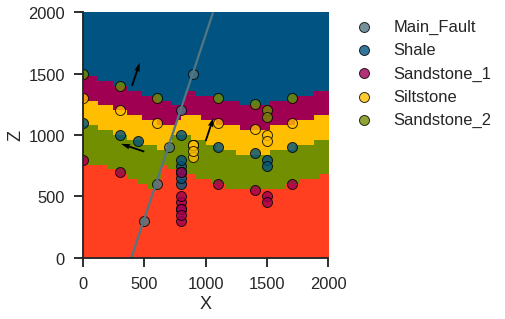

In [3]:
# Plot model section
%matplotlib inline
gp.plot.plot_section(
    model=geo_model,
    cell_number=25,
    direction='y',
    show_data=True
)

/home/namur/coding/environments/python_3.6.8/lib/python3.6/site-packages/gempy/plot/visualization_2d.py:386: UserWarning: The following kwargs were not used by contour: 'show_data'
  **kwargs)
/home/namur/coding/environments/python_3.6.8/lib/python3.6/site-packages/gempy/plot/visualization_2d.py:392: UserWarning: The following kwargs were not used by contour: 'show_data'
  **kwargs)


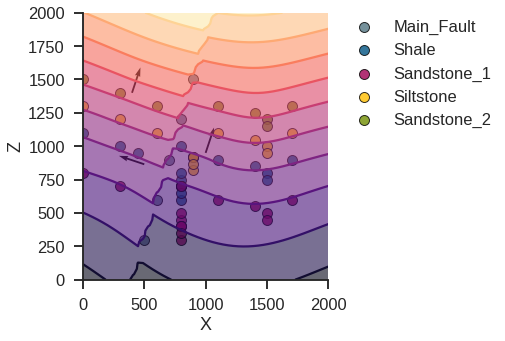

In [4]:
# Plot scalarfield
gp.plot.plot_scalar_field(
    model=geo_model,
    cell_number=25,
    N=10,
    series=1,
    direction='y',
    show_data=True
)

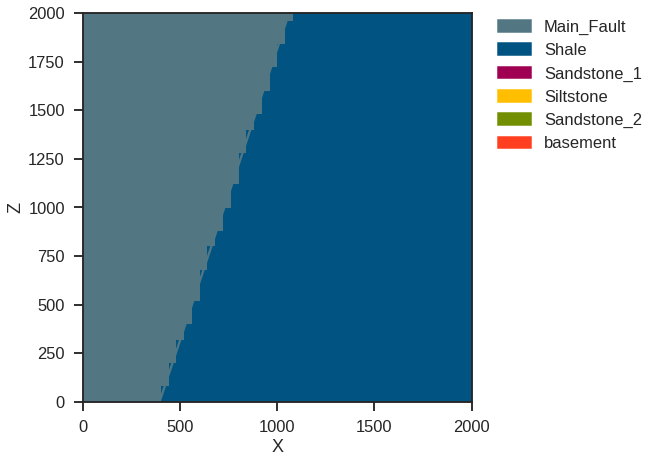

In [5]:
# Plot fault section
gp.plot.plot_section(
    geo_model,
    cell_number=25,
    block=geo_model.solutions.block_matrix[0, 0],
    show_data=False
)

### Work with model data

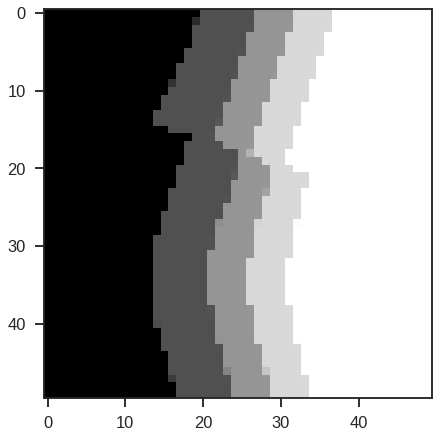

In [34]:
# Get section
# resphape to inital resolution, 25th layer along y-axis
section = solution.lith_block.reshape(50,50,50)[:,25,:]

In [27]:
# Get surfaces within section